In [1]:
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import re
import seaborn as sns
import folium

%matplotlib inline

## Read in DataFrame and create Lat-Lon DataFrame

In [2]:
listings_df = pd.read_csv('./listings.csv')

# Turn price into float

listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)
listings_df = listings_df[listings_df['price'] < 800]

In [3]:
# Create lat-lon DF

lat_lon_df = listings_df[['id', 'latitude', 'longitude', 'price']].copy()
lat_lon_df.head()

,id,latitude,longitude,price
0,12147973,42.282619,-71.133068,250.0
1,3075044,42.286241,-71.134374,65.0
2,6976,42.292438,-71.135765,65.0
3,1436513,42.281106,-71.121021,75.0
4,7651065,42.284512,-71.136258,79.0


## Calculate Standardised Price and use this for Colour Mapping

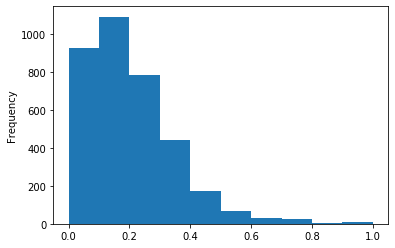

In [4]:
lat_lon_df['standardised_price'] = (lat_lon_df['price'] - lat_lon_df['price'].min()) / (lat_lon_df['price'].max() - lat_lon_df['price'].min())
lat_lon_df['standardised_price'].plot.hist()

In [5]:
cmap = cm.get_cmap('gist_heat_r')

## Create Folium Map

In [6]:
m = folium.Map(
    location= [lat_lon_df['latitude'].mean() - 0.0175, lat_lon_df['longitude'].mean()],
    tiles= 'cartodbpositron',
    zoom_start=12
)

In [7]:
for index, row in lat_lon_df.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    hex_colour = mpl.colors.rgb2hex(cmap(row['standardised_price']))
    
    folium.Circle(
        radius=1,
        location=[lat, lon],
        color=hex_colour
    ).add_to(m)

In [10]:
m

In [9]:
m.save('Boston_Price_Map.html')